In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import cv2

DIR = "/content/drive/MyDrive/ML_project/data/fungi_train_val"
directories = []

folders = os.listdir(DIR)

for folder in folders:
    photos = os.listdir(DIR + "/" + folder)
    cat = ' '.join(folder.split('_')[1:])
    super_cat = folder.split('_')[1]
    for photo in photos:
        path = DIR + "/" + folder + "/" + photo
        #img = cv2.imread(path)
        directories.append({
            'super_category': super_cat, 
            'category': cat, 
            'path': path
            #'height': img.shape[0],
            #'width': img.shape[1],
            #'colors': img.shape[2]
        })
        
df = pd.DataFrame(directories)
df

,super_category,category,path
0,Plicatura,Plicatura crispa,/content/drive/MyDrive/ML_project/data/fungi_t...
1,Plicatura,Plicatura crispa,/content/drive/MyDrive/ML_project/data/fungi_t...
2,Plicatura,Plicatura crispa,/content/drive/MyDrive/ML_project/data/fungi_t...
3,Plicatura,Plicatura crispa,/content/drive/MyDrive/ML_project/data/fungi_t...
4,Plicatura,Plicatura crispa,/content/drive/MyDrive/ML_project/data/fungi_t...
...,...,...,...
2051,Xerocomellus,Xerocomellus chrysenteron,/content/drive/MyDrive/ML_project/data/fungi_t...
2052,Xerocomellus,Xerocomellus chrysenteron,/content/drive/MyDrive/ML_project/data/fungi_t...
2053,Xerocomellus,Xerocomellus chrysenteron,/content/drive/MyDrive/ML_project/data/fungi_t...
2054,Xerocomellus,Xerocomellus chrysenteron,/content/drive/MyDrive/ML_project/data/fungi_t...


In [3]:
df_categories = df.groupby(['category']).count().rename(columns={'path':'count'})[['count']]
df_categories = df_categories.sort_values(by='count', ascending=False)
df_categories

,count
category,
Plicatura crispa,442
Pluteus cervinus,419
Tricholoma scalpturatum,414
Xerocomellus chrysenteron,406
Mycena galericulata,375


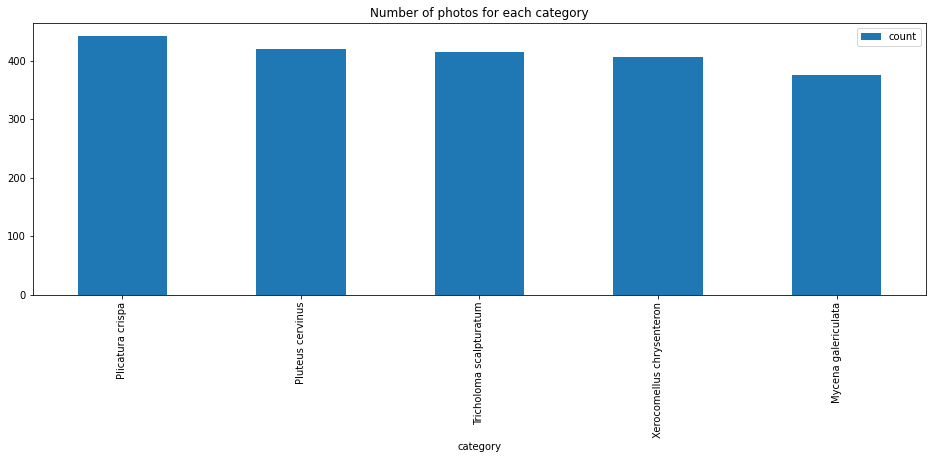

In [4]:
df_categories.head(20).plot.bar(title="Number of photos for each category", figsize=(16,5))

In [5]:
count_photos = df.groupby(['super_category']).count().rename(columns={'path':'count_photos'})[['count_photos']]
#count_photos = count_photos.sort_values(by='count_photos', ascending=False)

count_categories = df.drop(columns=['path']).drop_duplicates()
count_categories = count_categories.groupby(['super_category']).count().rename(columns={'category':'count_categories'})[['count_categories']]
#count_categories = count_categories.sort_values(by='count_categories', ascending=False)

df_super_categories = count_categories.join(count_photos)
df_super_categories

,count_categories,count_photos
super_category,,
Mycena,1,375
Plicatura,1,442
Pluteus,1,419
Tricholoma,1,414
Xerocomellus,1,406


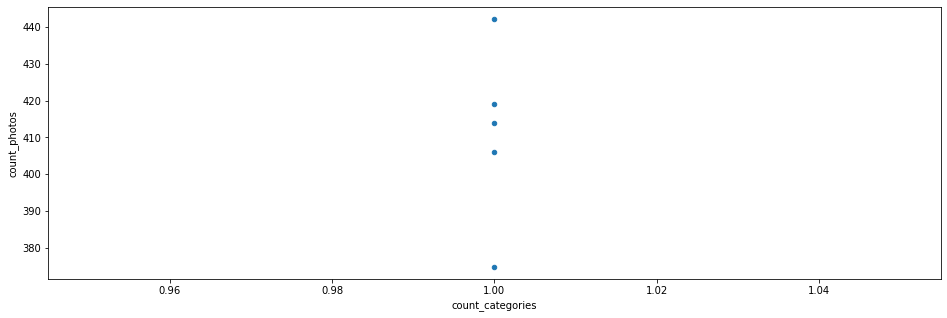

In [7]:
df_super_categories.plot.scatter(x='count_categories', y='count_photos', figsize=(16,5))

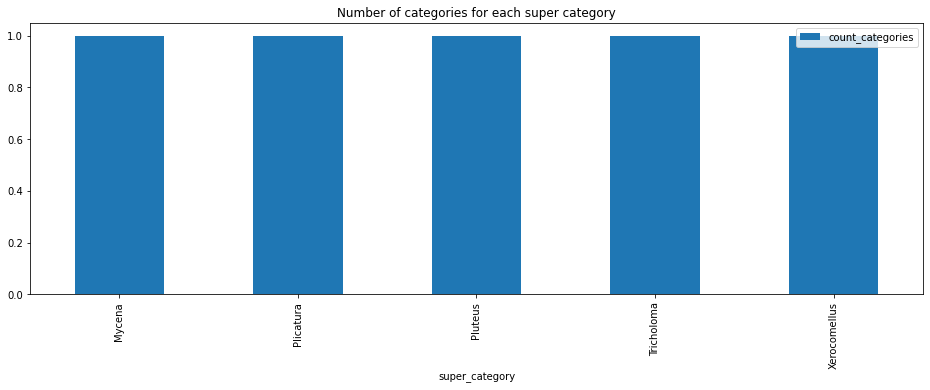

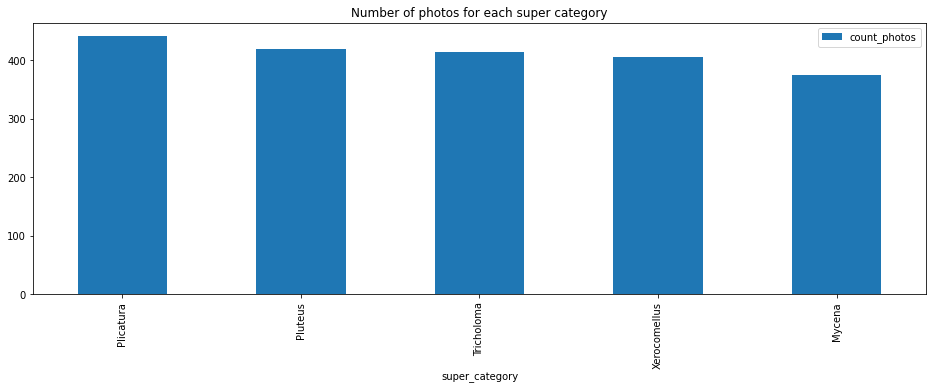

In [8]:
to_plot = df_super_categories[['count_categories']].sort_values(by='count_categories', ascending=False).head(20)
to_plot.plot.bar(title="Number of categories for each super category", figsize=(16,5))

to_plot = df_super_categories[['count_photos']].sort_values(by='count_photos', ascending=False).head(20)
to_plot.plot.bar(title="Number of photos for each super category", figsize=(16,5))